In [52]:
import sys
sys.path.insert(0, os.path.join("/Users/evanpan/Documents/GitHub/ManifoldExploration", 'src'))
import os
from matplotlib import pyplot as plt
import numpy as np
from blendshapes import *
from clustering import compute_ruzicka_similarity, compute_jaccard_similarity
from utils import *
from inference import *

In [39]:
PROJ_ROOT = "/Users/evanpan/Documents/GitHub/ManifoldExploration"

config = load_config(os.path.join(*[PROJ_ROOT, "experiments", "attention"]))
model = load_model(config)
model.eval()

AttentiveAutoEncoder(
  (nonlinearity): ReLU()
  (input_reshaper): Reshaper()
  (input_layer_embedding): Linear(in_features=1, out_features=8, bias=False)
  (input_layer_attention): SelfAttention(
    (query): Linear(in_features=8, out_features=24, bias=True)
    (key): Linear(in_features=8, out_features=24, bias=True)
    (value): Linear(in_features=8, out_features=24, bias=True)
    (multihead_attention): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=24, out_features=24, bias=True)
    )
  )
  (input_layer): Sequential(
    (0): Reshaper()
    (1): Linear(in_features=1, out_features=8, bias=False)
    (2): SelfAttention(
      (query): Linear(in_features=8, out_features=24, bias=True)
      (key): Linear(in_features=8, out_features=24, bias=True)
      (value): Linear(in_features=8, out_features=24, bias=True)
      (multihead_attention): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=24, out_features=24, bias=T

In [47]:
blendshapes = load_blendshape(model="SP")
weights = torch.zeros(len(blendshapes))

In [70]:
# weights_in = weights.unsqueeze(0)
weights[0] = 1
weights[12] = 1
weights += 0.1
out = model(weights)

/var/folders/dj/fb2zmgq93sv7xnbfzqj2n3pm0000gn/T/ipykernel_41481/3489699066.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, 1)


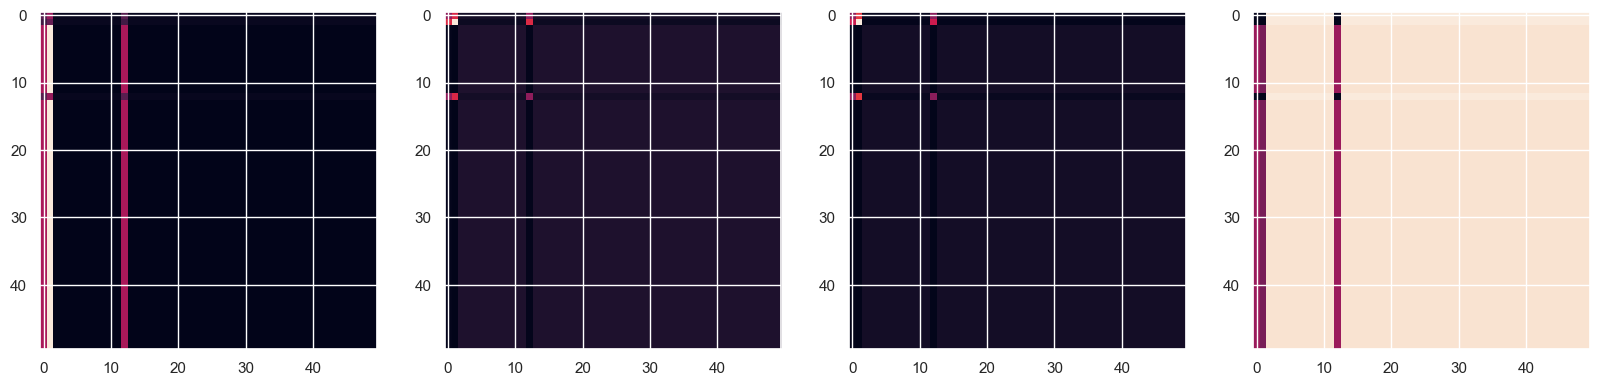

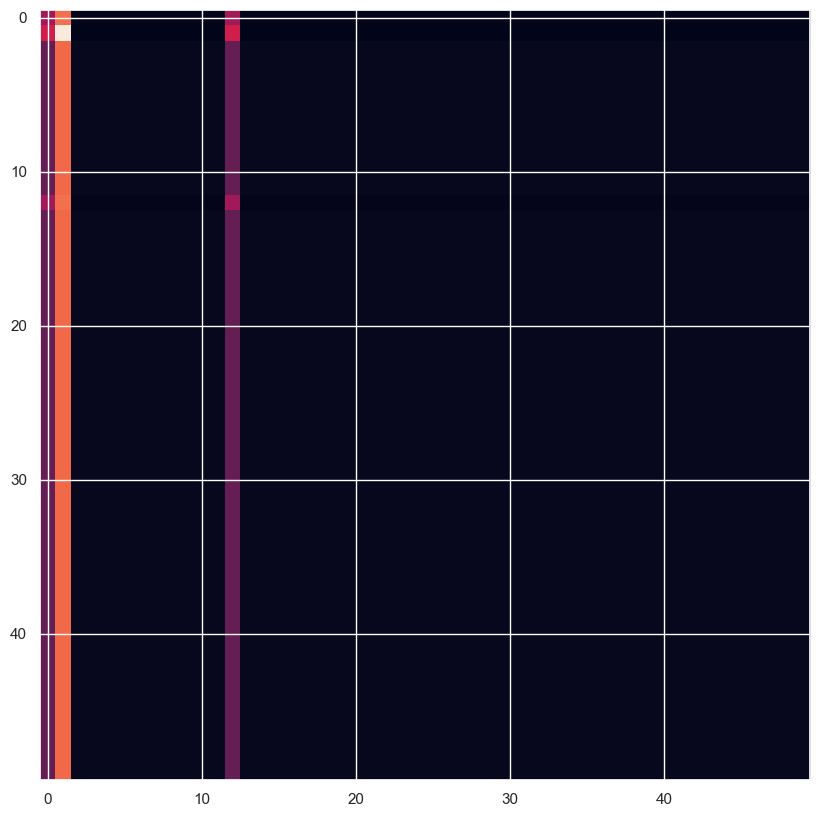

In [71]:
# plot the attention masks as heatmaps
attention_masks = out[1].detach().numpy()
# size the plot to be big
plt.figure(figsize=(20, 10))
# remove the grid
plt.grid(False)

plt.subplot(1, 4, 1)
plt.imshow(attention_masks[0, 0, :, :])
plt.subplot(1, 4, 2)
plt.imshow(attention_masks[0, 1, :, :])
plt.subplot(1, 4, 3)
plt.imshow(attention_masks[0, 2, :, :])
plt.subplot(1, 4, 4)
plt.imshow(attention_masks[0, 3, :, :])
plt.show()
# plot all together
plt.figure(figsize=(20, 10))
sum_masks = np.sum(attention_masks[0], axis=0)
plt.imshow(sum_masks)
